<a href="https://colab.research.google.com/github/Dennis-Farias/data_science/blob/main/Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
import pandas as pd

In [ ]:
vendas = pd.read_csv('relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')

vendas

In [ ]:
vendas.info()

**Pergunta 1** - Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?

In [ ]:
# Criando um df com os dados desejados
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]

# Gerando uma coluna que representa apenas os anos puxando-os da coluna data pedido
df_vendas_ano['ano'] = df_vendas_ano['data_pedido'].dt.year
df_vendas_ano.drop(labels='data_pedido', axis=1, inplace=True)

# Agrupando os dados por ano
df_vendas_ano = df_vendas_ano.groupby(['ano']).aggregate('sum')

df_vendas_ano

In [ ]:
def grafico_vendas(cores: list=[AZUL2]):
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(10, 4))
  sns.set_theme(style='white')

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y='vendas', palette = cores)

  ax.set_title('Vendas das lojas de departamentos de \n2016 a 2019', loc='left', fontsize=18, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
  sns.despine(left=True, bottom=True)

  ax.set_yticklabels([])
  for i, valor in enumerate(df_vendas_ano['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e5
    ax.text(i, valor + offset, qtd, ha='center', fontsize=12, color=CINZA2, va = 'center')

  return ax

ax = grafico_vendas()

<ipython-input-24-6dacbb14d9f8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano, x=df_vendas_ano.index, y='vendas', palette = cores)


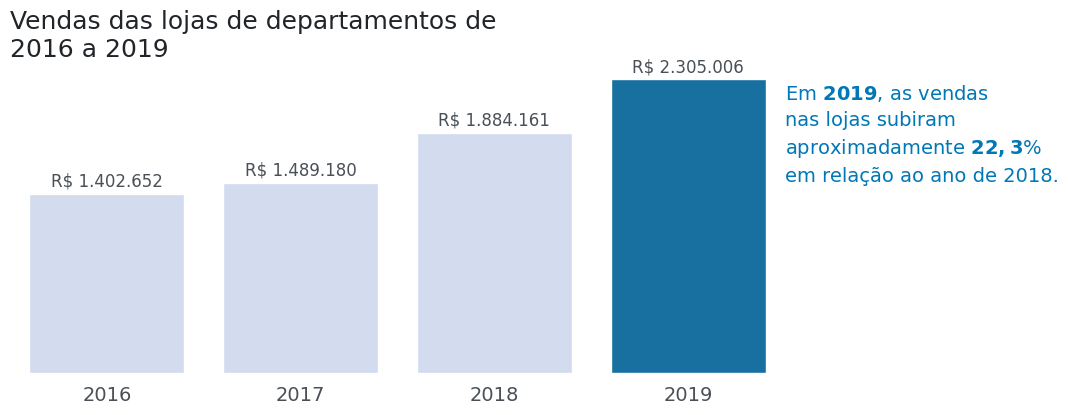

In [27]:
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano, 'vendas'] == df_vendas_ano['vendas'].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

ax = grafico_vendas(cores)

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

**Pergunta 2** - Qual é o top7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?

In [ ]:
top_lucro = vendas.copy()
top_lucro = top_lucro[['tipo_produto', 'lucro']]

top_lucro = top_lucro.groupby(['tipo_produto']).aggregate('sum').sort_values('lucro', ascending=False)

top_7 = top_lucro[:7]

top_7

In [ ]:
def grafico_top_7():
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(10, 4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style='white')

  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  ax = sns.barplot(data=top_7, x='lucro', y=top_7.index, palette = cores)

  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', loc='left', fontsize=18, color=CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor=CINZA2)
  sns.despine(left=True, bottom=True)

  for i, valor in enumerate(top_7['lucro']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 1e3
    ax.text(valor - offset, i, qtd, ha='right', fontsize=10, color=CINZA5, va = 'center', fontweight='bold')

  return ax

ax = grafico_top_7()

In [40]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<ipython-input-39-322333da233d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_7, x='lucro', y=top_7.index, palette = cores)


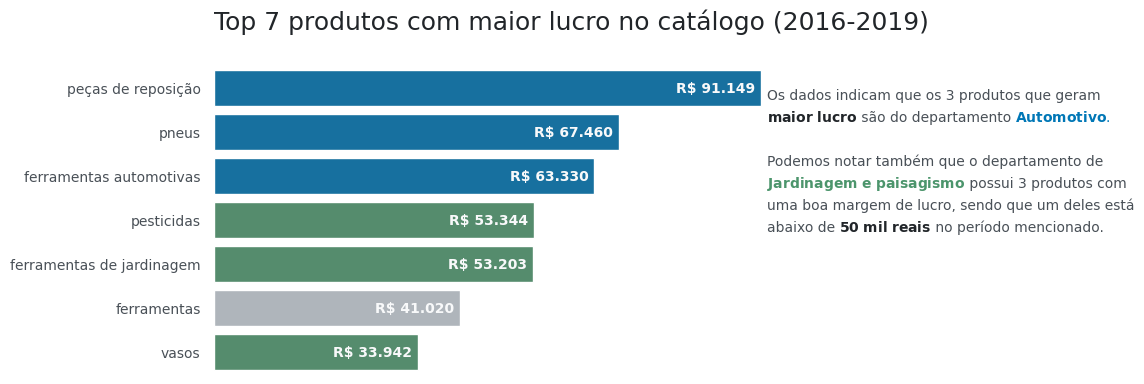

In [41]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                       			 # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                       	           # linha 1                         		 # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                                     # linha 3
     [CINZA2],                       	          # linha 4
     [VERDE1, CINZA2],                   # linha 5
     [CINZA2],                                    # linha 6
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22,				 # espaçamento
    ax=ax,				 # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()